# Showcase Notebook for Usage Examples

### Import Project and Cluster Methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
import sys
sys.path.append(PROJECT_PATH)
import src.model_training.clusters as cl
import pandas as pd
from src.data_representation.Examples import load_Examples_from_file

### Load Examples

In [3]:
import os
PROJECT_PATH = os.getcwd().replace("notebooks", "")
DATA_GEN_FOLDER_NAME = "Jan-03-2021"
DATASET_PATH = PROJECT_PATH + "data/" + DATA_GEN_FOLDER_NAME + "/"
OVERVIEW_DATASET_PATH = DATASET_PATH + "overview.csv"
overview_df = pd.read_csv(OVERVIEW_DATASET_PATH)

overview_df

,Unnamed: 0,divide_by_country_population,do_smoothing,nr_days_for_avg,do_data_augmentation,percent_varianz,filename
0,0,no,no,-1,no,-1,data/Jan-03-2021/0
1,1,no,yes,3,no,-1,data/Jan-03-2021/1
2,2,no,yes,7,no,-1,data/Jan-03-2021/2
3,3,no,yes,14,no,-1,data/Jan-03-2021/3
4,4,no,yes,30,no,-1,data/Jan-03-2021/4
5,5,yes,no,-1,no,-1,data/Jan-03-2021/5
6,6,yes,yes,3,no,-1,data/Jan-03-2021/6
7,7,yes,yes,7,no,-1,data/Jan-03-2021/7
8,8,yes,yes,14,no,-1,data/Jan-03-2021/8
9,9,yes,yes,30,no,-1,data/Jan-03-2021/9


In [14]:
#load files from filename col and apply models to that with different cluster sizes
data = []
for f in overview_df['filename']:
    data.append((load_Examples_from_file(PROJECT_PATH + str(f)), f))

    
from tqdm import tqdm
n_clusters = [3, 4, 5, 10]
models = [cl.KMedoids, cl.KMeans,  cl.DBSCAN, cl.TS_KMeans, cl.TS_KShape]
for n in n_clusters:
    filenames = []
    for m in tqdm(models):
        model_names = []
        for ex,file in data:
            ex.add_padding()
            model = m(n, metric='euclidean').fit(ex)
            filenr = file.split("/")[-1]
            filename = f"{model.name}_no_cluster_{n}_{filenr}"
            model.save_model(filename)
            model_names.append(filename)
        filenames.append(model_names)
    overview_df[f'kmedoids_{n}_filename'] = filenames[0]
    overview_df[f'kmeans_{n}_filename'] = filenames[1]
    overview_df[f'dbscan_{n}_filename'] = filenames[2]
    overview_df[f'ts_kmeans_{n}_filename'] = filenames[3]
    overview_df[f'ts_kshape_{n}_filename'] = filenames[4]
overview_df.to_csv(DATASET_PATH + "overview_filenames.csv")

100%|██████████| 5/5 [00:38<00:00,  7.77s/it]


In [15]:
import copy
import pickle
value_overview = copy.deepcopy(overview_df).to_numpy()
for col in range(7,value_overview.shape[1]):
    for row in range(value_overview.shape[0]):
        filename = value_overview[row][col]
        with open(DATASET_PATH + "model/" + filename, 'rb') as f:
            model = pickle.load(f)
            var, n_max, n_min = model.statistics()
            value_overview[row][col] = var

            
value_overview = pd.DataFrame(value_overview, columns=overview_df.columns)
value_overview

,Unnamed: 0,divide_by_country_population,do_smoothing,nr_days_for_avg,do_data_augmentation,percent_varianz,filename,kmedoids_3_filename,kmeans_3_filename,dbscan_3_filename,...,kmedoids_5_filename,kmeans_5_filename,dbscan_5_filename,ts_kmeans_5_filename,ts_kshape_5_filename,kmedoids_10_filename,kmeans_10_filename,dbscan_10_filename,ts_kmeans_10_filename,ts_kshape_10_filename
0,0,no,no,-1,no,-1,data/Jan-03-2021/0,2173.56,9568.22,9987.56,...,745.04,5993.44,7191.04,5919.84,2397.44,206.56,2504.56,3679.56,2514.96,308.76
1,1,no,yes,3,no,-1,data/Jan-03-2021/1,2101.56,9568.22,9987.56,...,721.44,5993.44,6538.24,5993.44,809.04,271.56,2789.16,3490.56,2546.16,450.36
2,2,no,yes,7,no,-1,data/Jan-03-2021/2,2086.22,9568.22,8899.56,...,637.04,5993.44,6231.04,6295.84,621.44,218.36,2651.36,3417.76,2750.76,347.56
3,3,no,yes,14,no,-1,data/Jan-03-2021/3,2086.22,9568.22,8769.56,...,1125.44,5993.44,6082.24,6295.84,741.44,222.36,2624.36,3381.96,2567.16,394.36
4,4,no,yes,30,no,-1,data/Jan-03-2021/4,2272.22,9568.22,8262.89,...,488.24,6067.84,6009.04,6067.84,1415.84,301.36,2753.96,3311.56,1717.36,456.56
5,5,yes,no,-1,no,-1,data/Jan-03-2021/5,464.222,5286.89,9987.56,...,365.44,3111.04,7191.04,2411.44,1240.24,295.16,1458.16,4044.96,1469.76,660.96
6,6,yes,yes,3,no,-1,data/Jan-03-2021/6,542.889,3296.22,9987.56,...,301.84,2357.04,7191.04,2355.44,1659.84,237.76,1460.76,4044.96,1444.76,359.16
7,7,yes,yes,7,no,-1,data/Jan-03-2021/7,536.222,2086.22,9987.56,...,429.44,2643.44,7191.04,2120.24,519.04,234.36,1378.36,4044.96,1177.76,419.96
8,8,yes,yes,14,no,-1,data/Jan-03-2021/8,542.889,2101.56,9987.56,...,403.84,2229.84,7191.04,1639.44,257.04,256.76,1394.16,4044.96,1404.76,246.16
9,9,yes,yes,30,no,-1,data/Jan-03-2021/9,626.889,2101.56,9987.56,...,194.24,1960.64,7191.04,1941.44,1358.24,177.36,1272.56,4044.96,930.96,786.76


In [ ]:
#old code used to find min -> TODO verbessern
comment = '''
df_ = pd.DataFrame(value_overview, columns=var_df.columns)
df_.min()
ts_k = df_[df_["ts_kshape_10_filename"] <= 171]
print(ts_k)
# print(overview_df.iloc[4])
with open(DATASET_PATH + "model/TS_KShape_no_cluster_10_46", 'rb') as f:
            ts_kshape_10 = pickle.load(f)
        
ts_kshape_10.plot_geo_cluster().show()
ts_kshape_10.plot_cluster().show()
'''

### Demonstration of Augmentation/Smoothing

In [ ]:
germany = []
for d in data:
    germany.append(list(filter(lambda snippet: snippet.country_id=="DEU", d[0].train_data))[0])

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
for g in germany:
    plt.plot(g.time_series)
plt.xlabel('Different methodologys on german time series')
plt.show()

# Visualizing var_df 


## Bar plot depending on arbitrary item 

(2, 27)
(8, 27)


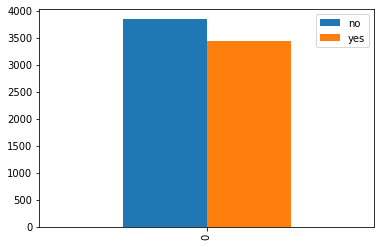

In [17]:
#one of value_overview.columns 
#or special case clustering method
attr_of_interest = "do_smoothing"
bar_df = []
bar_df_labels = []
for table in value_overview.groupby(attr_of_interest):
    avg_value = 0 
    for row in table[1].iterrows():
        avg_value+= row[1].iloc[7:table[1].shape[1]].sum()/(table[1].shape[1]-7)
    avg_value/=table[1].shape[0]
    bar_df_labels.append(str(table[0]))
    bar_df.append(avg_value)


pd.DataFrame([bar_df], columns=bar_df_labels).plot.bar()

## 2 dim plot showing realtion between two 

In [ ]:
import plotly.express as px
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip")
fig.show()